In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

pd.set_option('display.max_columns', 1000000)
pd.options.display.max_rows = 1000000

In [2]:
# load data
path = '/Users/sanghyunkim/Desktop/Data Science Project/MLB Analysis/Statcast_Analysis/data'
all_files = glob.glob(os.path.join(path, '*.csv'))
statcast_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:
# data structure
print(statcast_df.shape)
statcast_df.head()

(1002155, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FT,2016-10-02,92.8,-1.72,5.27,Erasmo Ramirez,595777,541640,field_out,hit_into_play,NaN,NaN,NaN,NaN,7.0,Jurickson Profar flies out to right fielder Ja...,R,L,R,TEX,TB,X,9.0,fly_ball,2,2,2016,-1.45,1.02,-0.29,1.97,NaN,NaN,NaN,1,10,Bot,211.16,103.59,NaN,NaN,571912.0,NaN,161002_181329,7.151,-134.966,-4.869,-17.830,25.020,-21.399,3.27,1.56,334.0,100.8,46.0,93.2,2174.0,6.2,449296,541640,571912.0,572128.0,523253.0,446334.0,493351.0,572816.0,543484.0,543094.0,50.0,0.064,0.116,0.0,1.0,0,0,3.0,93,7,2-Seam Fastball,4,6,4,6,6,4,4,6,Standard,Standard
1,FT,2016-10-02,92.0,-1.54,5.27,Erasmo Ramirez,607387,541640,field_out,hit_into_play,NaN,NaN,NaN,NaN,13.0,"Ryan Rua grounds out, second baseman Logan For...",R,R,R,TEX,TB,X,4.0,ground_ball,0,0,2016,-1.37,0.88,-0.84,2.49,NaN,NaN,NaN,0,10,Bot,120.30,145.81,NaN,NaN,571912.0,NaN,161002_181033,4.909,-133.901,-2.939,-16.158,28.266,-23.430,3.65,1.61,8.0,77.8,-21.0,92.4,2288.0,6.4,449296,541640,571912.0,572128.0,523253.0,446334.0,493351.0,572816.0,543484.0,543094.0,50.0,0.048,0.043,0.0,1.0,0,0,2.0,92,1,2-Seam Fastball,4,6,4,6,6,4,4,6,Infield shift,Standard
2,FF,2016-10-02,96.0,-1.15,5.53,Tanner Scheppers,523253,489294,field_out,hit_into_play,NaN,NaN,NaN,NaN,11.0,"Logan Forsythe grounds out, third baseman Joey...",R,R,R,TEX,TB,X,5.0,ground_ball,3,2,2016,-1.30,1.04,-0.93,2.53,592200.0,NaN,NaN,2,10,Top,109.64,166.16,NaN,NaN,592592.0,NaN,161002_180834,3.660,-139.586,-4.677,-16.921,25.532,-20.364,3.45,1.56,23.0,66.4,-4.0,96.7,2295.0,6.3,449296,489294,592592.0,607387.0,595777.0,608336.0,593643.0,608577.0,592261.0,592419.0,50.0,0.080,0.072,0.0,1.0,0,0,2.0,91,6,4-Seam Fastball,4,6,6,4,6,4,6,4,Standard,Standard
3,FF,2016-10-02,94.7,-1.47,5.97,Carl Edwards Jr.,454975,605218,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,"Hernan Iribarren grounds out sharply, pitcher ...",R,L,R,CIN,CHC,X,1.0,ground_ball,1,1,2016,-0.01,1.31,-0.21,2.00,NaN,NaN,NaN,2,9,Bot,112.67,169.30,NaN,NaN,543148.0,NaN,161002_183117,3.140,-137.620,-7.720,1.680,26.960,-17.060,3.45,1.61,16.0,102.4,-7.0,95.1,2600.0,6.6,449284,605218,543148.0,458085.0,493128.0,600303.0,595879.0,575929.0,546991.0,519333.0,50.0,0.286,0.258,0.0,1.0,0,0,2.0,80,3,4-Seam Fastball,4,7,4,7,7,4,4,7,Standard,Standard
4,FF,2016-10-02,96.3,-1.30,5.94,Carl Edwards Jr.,573113,605218,field_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,Tony Renda lines out to right fielder Matt Szc...,R,R,R,CIN,CHC,X,9.0,line_drive,1,1,2016,0.08,1.35,0.34,2.63,NaN,NaN,NaN,1,9,Bot,166.60,106.88,NaN,NaN,543148.0,NaN,161002_183006,4.040,-140.040,-6.410,3.010,25.600,-15.790,3.19,1.42,271.0,88.6,18.0,98.1,2659.0,7.2,449284,605218,543148.0,458085.0,493128.0,600303.0,595879.0,575929.0,546991.0,519333.0,50.0,0.575,0.576,0.0,1.0,0,0,4.0,79,3,4-Seam Fastball,4,7,4,7,7,4,4,7,Standard,Standard


In [4]:
missing_cols = statcast_df.columns[statcast_df.isnull().any()]
statcast_df[missing_cols].isnull().sum()

pitch_type                            6149
release_speed                         5928
release_pos_x                         5655
release_pos_z                         5655
spin_dir                           1002155
spin_rate_deprecated               1002155
break_angle_deprecated             1002155
break_length_deprecated            1002155
zone                                  6897
des                                      3
hit_location                         70120
pfx_x                                 5655
pfx_z                                 5655
plate_x                               5655
plate_z                               5655
on_3b                               914136
on_2b                               822920
on_1b                               729276
hc_x                                   831
hc_y                                   831
tfs_deprecated                     1002155
tfs_zulu_deprecated                1002155
fielder_2                           580183
umpire     

In [5]:
data = statcast_df.copy()

cols_to_drop = ['fielder_2.1', 'des',
                'spin_dir',
                'spin_rate_deprecated',
                'break_angle_deprecated',
                'break_length_deprecated',
                'tfs_deprecated',
                'tfs_zulu_deprecated',
                'umpire', 'pitcher.1']
data.drop(cols_to_drop, axis=1, inplace=True)

data.rename({'estimated_ba_using_speedangle': 'xBA',
            'estimated_woba_using_speedangle': 'xwOBA'}, axis=1, inplace=True)

In [6]:
event_grp = data.groupby('events')
print(event_grp.size())
event_grp['launch_speed', 'launch_angle'].describe()

events
double       103764
field_out    480000
home_run      64155
single       343610
triple        10626
dtype: int64


launch_speed                                                    \
                 count        mean        std   min    25%    50%    75%   
events                                                                     
double         44063.0   97.235036   9.803921  32.2   93.2   99.3  103.8   
field_out     197607.0   85.212491  12.742300   5.2   79.6   86.0   94.5   
home_run       31022.0  103.384701   4.444425  74.5  100.5  103.4  106.4   
single        140165.0   90.524523  13.342032  11.8   82.3   93.0  100.7   
triple          4426.0   97.886127   7.261237  47.3   94.6   99.1  102.6   

                 launch_angle                                                \
             max        count       mean        std   min   25%   50%   75%   
events                                                                        
double     119.7      44063.0  16.392257  10.655507 -73.0  12.0  17.0  22.0   
field_out  119.4     197587.0  14.857825  31.473382 -89.0 -11.0  16.0  39.0   
home_run   121.7      31021.0  28.161794   5.209935 -13.0  24.0  28.0  32.0   
single     122.2     140158.0   6.193703  15.347482 -88.0   0.0   9.0  15.0   
triple     115.3       4426.0  19.541798  10.005905 -43.0  15.0  20.0  26.0   

                 
            max  
events           
double     70.0  
field_out  89.0  
home_run   51.0  
single     81.0  
triple     63.0

      events  launch_speed  launch_angle
1  field_out     85.212491     14.857825
3     single     90.524523      6.193703
0     double     97.235036     16.392257
4     triple     97.886127     19.541798
2   home_run    103.384701     28.161794


Text(0.5, 1.0, 'Average Exit Velocity and Angle of Batted Balls for Each Hitting Event')

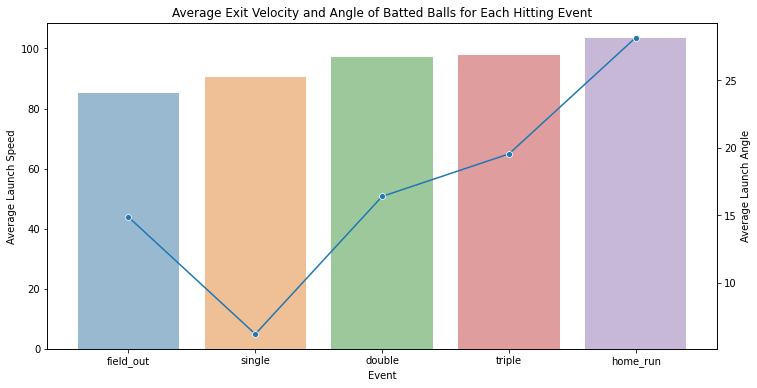

In [7]:
avg_launchSpdAng = event_grp['launch_speed', 'launch_angle'].mean().reset_index().sort_values('launch_speed')
print(avg_launchSpdAng)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

sns.barplot(data=avg_launchSpdAng, x='events', y='launch_speed', alpha=.5, ax=ax1)
sns.lineplot(data=avg_launchSpdAng, x='events', y='launch_angle', marker='o', sort=False, ax=ax2)
ax1.set_xlabel('Event')
ax1.set_ylabel('Average Launch Speed')
ax2.set_ylabel('Average Launch Angle')
ax1.set_title('Average Exit Velocity and Angle of Batted Balls for Each Hitting Event')

In [8]:
pitch_grp = data.groupby('pitch_name')
pitch_grp['events'].value_counts(normalize=True)

pitch_name        events   
2-Seam Fastball   field_out    0.468510
                  single       0.367597
                  double       0.100295
                  home_run     0.053265
                  triple       0.010334
4-Seam Fastball   field_out    0.478421
                  single       0.327974
                  double       0.107990
                  home_run     0.073744
                  triple       0.011872
Changeup          field_out    0.497293
                  single       0.328737
                  double       0.101992
                  home_run     0.062417
                  triple       0.009561
Curveball         field_out    0.491921
                  single       0.338773
                  double       0.102309
                  home_run     0.057098
                  triple       0.009899
Cutter            field_out    0.484520
                  single       0.344543
                  double       0.099096
                  home_run     0.062481
            

In [9]:
bb_type = data.groupby('bb_type')
bb_type[['xBA', 'xwOBA']].mean().reset_index()

,bb_type,xBA,xwOBA
0,fly_ball,0.324282,0.551400
1,ground_ball,0.272898,0.252555
2,line_drive,0.669149,0.719708
3,popup,0.044350,0.042441


In [10]:
bb_type[['launch_speed', 'launch_angle']].mean().reset_index()

,bb_type,launch_speed,launch_angle
0,fly_ball,92.200229,35.588904
1,ground_ball,87.064695,-9.999313
2,line_drive,93.546950,16.465727
3,popup,76.763869,63.268795


In [11]:
data['release_speed'].describe().reset_index()

bins = [55, 80, 85, 90, 95, 100, 105, 110]
labels = ['x ≤ 80', '81 ≤ x ≤ 85', '86 ≤ x ≤ 90', '91 ≤ x ≤ 95', '96 ≤ x ≤ 100', '100 ≤ x ≤ 105', '106 ≤ x']

data['release_spd_bin'] = pd.cut(data['release_speed'], bins, labels=labels, include_lowest=True, right=True)

In [12]:
pitch_spd = data.groupby('release_spd_bin')

pitch_spd[['launch_speed', 'launch_angle', 'xBA', 'xwOBA']].mean().reset_index()

,release_spd_bin,launch_speed,launch_angle,xBA,xwOBA
0,x ≤ 80,87.730868,13.560169,0.390662,0.440477
1,81 ≤ x ≤ 85,88.171367,12.824228,0.395778,0.449066
2,86 ≤ x ≤ 90,89.160684,12.216542,0.400051,0.457362
3,91 ≤ x ≤ 95,90.959017,13.930811,0.412750,0.477401
4,96 ≤ x ≤ 100,90.591433,12.682734,0.403138,0.456897
5,100 ≤ x ≤ 105,89.166874,7.367030,0.367995,0.393344
6,106 ≤ x,57.200000,-6.000000,0.084000,0.082000


In [13]:
bb = pitch_spd['launch_speed_angle'].value_counts().unstack()
bb

launch_speed_angle,1.0,2.0,3.0,4.0,5.0,6.0
release_spd_bin,,,,,,
x ≤ 80,1235.0,9447.0,7963.0,11625.0,2209.0,2780.0
81 ≤ x ≤ 85,2293.0,19666.0,14618.0,22359.0,4358.0,5915.0
86 ≤ x ≤ 90,2833.0,28983.0,19738.0,31457.0,6265.0,9010.0
91 ≤ x ≤ 95,3659.0,43402.0,34776.0,53029.0,11580.0,16380.0
96 ≤ x ≤ 100,1234.0,14695.0,10454.0,16445.0,3316.0,4455.0
100 ≤ x ≤ 105,17.0,252.0,106.0,196.0,42.0,30.0
106 ≤ x,1.0,NaN,NaN,NaN,NaN,NaN


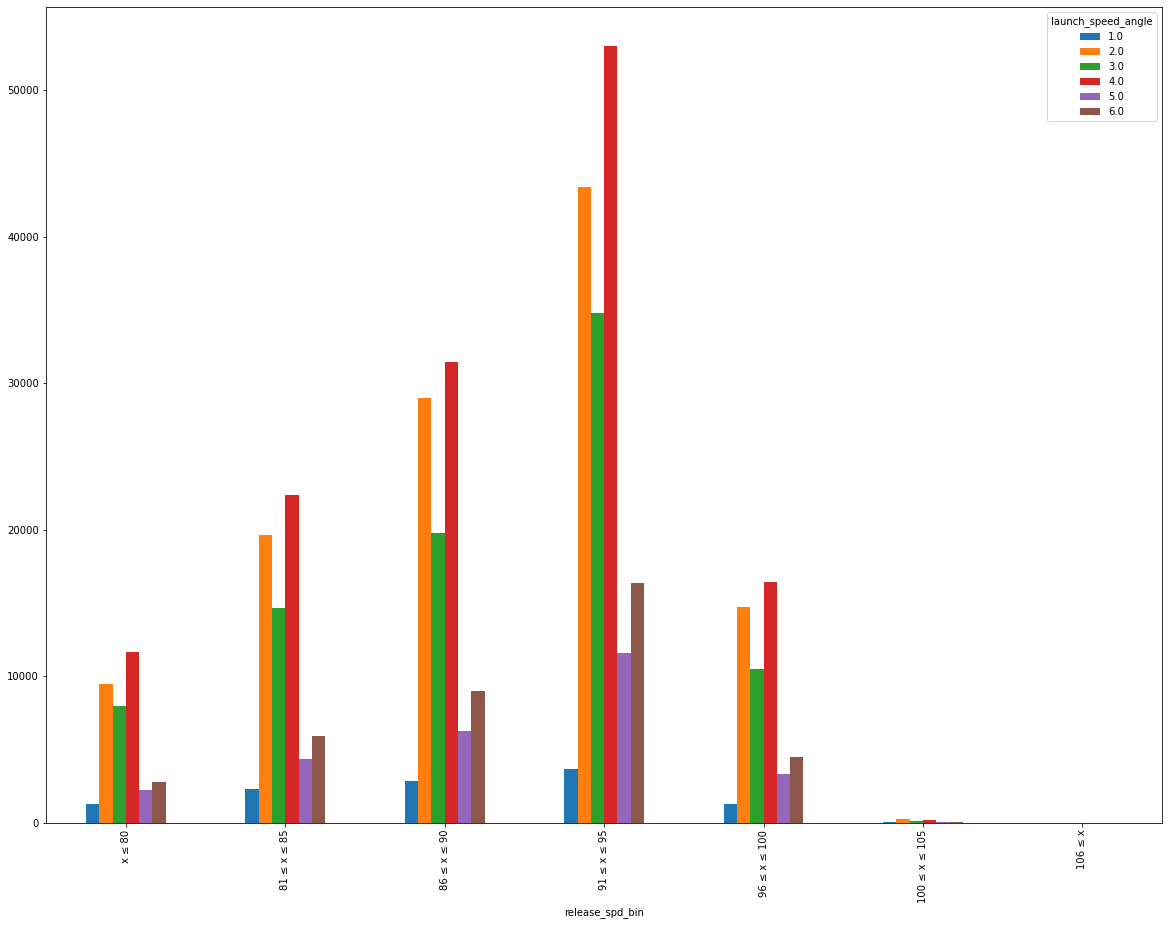

In [14]:
bb.plot.bar(figsize=(20, 15))
plt.show()

In [15]:
team_grp = data.groupby('home_team')

a = team_grp['launch_speed'].mean().round(2).reset_index()
a[a['launch_speed'] > 90].sort_values('launch_speed', ascending=False).reset_index(drop=True)

,home_team,launch_speed
0,ARI,90.49
1,BOS,90.18
2,OAK,90.17
3,BAL,90.16
4,SEA,90.14
5,TEX,90.12
6,COL,90.11
7,MIN,90.11
8,DET,90.09


In [16]:
b = team_grp['events'].apply(lambda x: x[x == 'home_run'].count())
b.reset_index(name='Count').sort_values('Count', ascending=False)

,home_team,Count
2,BAL,2729
19,NYY,2709
5,CIN,2571
29,TOR,2532
7,COL,2513
28,TEX,2482
16,MIL,2446
8,CWS,2413
21,PHI,2342
11,HOU,2254


In [17]:
c = data.loc[(data['balls'] == 3)&(data['strikes']==2)]
c['events'].value_counts(normalize=True).reset_index()

,index,events
0,field_out,0.480436
1,single,0.329520
2,double,0.107214
3,home_run,0.070785
4,triple,0.012046


    year  Count
0   2008   4878
1   2009   5042
2   2010   4613
3   2011   4552
4   2012   4934
5   2013   4661
6   2014   4186
7   2015   4909
8   2016   5610
9   2017   6105
10  2018   5585
11  2019   6776
12  2020   2304


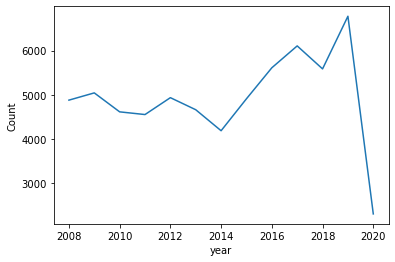

In [18]:
data['game_date'] = pd.to_datetime(data['game_date'])
data['year'] = data['game_date'].dt.year

year_grp = data.groupby('year')
d = year_grp['events'].apply(lambda x: x[x=='home_run'].count()).reset_index(name='Count')
print(d.sort_values('year').reset_index(drop=True))

sns.lineplot(x='year', y='Count', data=d)
plt.show()

In [19]:
defen_grp = data.groupby('if_fielding_alignment')
defen_grp['events'].value_counts(normalize=True)

if_fielding_alignment  events   
Infield shift          field_out    0.466980
                       single       0.307841
                       double       0.111831
                       home_run     0.104740
                       triple       0.008608
Standard               field_out    0.476484
                       single       0.342257
                       double       0.103078
                       home_run     0.067368
                       triple       0.010814
Strategic              field_out    0.449810
                       single       0.363182
                       double       0.104898
                       home_run     0.071190
                       triple       0.010921
Name: events, dtype: float64

In [20]:
pitch_grp = data.groupby('pitch_name')
pitch_grp['events'].value_counts(normalize=True).unstack()

events,double,field_out,home_run,single,triple
pitch_name,,,,,
2-Seam Fastball,0.100295,0.468510,0.053265,0.367597,0.010334
4-Seam Fastball,0.107990,0.478421,0.073744,0.327974,0.011872
Changeup,0.101992,0.497293,0.062417,0.328737,0.009561
Curveball,0.102309,0.491921,0.057098,0.338773,0.009899
Cutter,0.099096,0.484520,0.062481,0.344543,0.009360
Eephus,0.071672,0.580205,0.047782,0.300341,NaN
Fastball,0.131868,0.373626,0.076923,0.406593,0.010989
Forkball,0.111111,0.473333,0.068889,0.322222,0.024444
Intentional Ball,1.000000,NaN,NaN,NaN,NaN


In [21]:
a = data.groupby('home_team')
a['launch_speed'].mean().reset_index()
a.get_group('BOS')['events'].value_counts()

field_out    15895
single       11825
double        4455
home_run      2147
triple         335
Name: events, dtype: int64

In [23]:
idx = np.array([-5, -4, -3, -2, -1])
data.iloc[idx]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,xBA,xwOBA,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,release_spd_bin,year
1002150,CH,2010-04-04,88.9,-2.25,5.14,Josh Beckett,429664,277417,single,hit_into_play_no_out,8.0,R,L,R,BOS,NYY,X,9.0,fly_ball,0,0,2010,-1.61,1.05,-0.14,1.95,NaN,NaN,NaN,2,5,Top,197.79,64.26,NaN,100404_214100,8.810,-129.205,-3.666,-17.568,32.259,-22.252,3.45,1.74,NaN,NaN,NaN,NaN,NaN,NaN,263816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,0.9,NaN,1,0,NaN,36,1,Changeup,1,5,5,1,5,1,5,1,NaN,NaN,86 ≤ x ≤ 90,2010
1002151,CH,2010-04-04,88.4,-2.06,5.16,Josh Beckett,116539,277417,single,hit_into_play_score,38.0,R,R,R,BOS,NYY,X,7.0,ground_ball,1,0,2010,-1.12,1.53,0.16,1.98,NaN,430897.0,458731.0,2,4,Top,97.39,95.38,NaN,100404_212241,7.954,-128.373,-4.799,-11.834,26.710,-16.575,3.54,1.77,NaN,NaN,NaN,NaN,NaN,NaN,263816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,0.9,NaN,1,0,NaN,29,2,Changeup,1,3,3,1,3,1,3,1,NaN,NaN,86 ≤ x ≤ 90,2010
1002152,NaN,2010-04-04,NaN,NaN,NaN,Josh Beckett,458731,277417,single,hit_into_play_score,NaN,R,L,R,BOS,NYY,X,7.0,line_drive,3,2,2010,NaN,NaN,NaN,NaN,429664.0,NaN,430897.0,2,4,Top,91.37,102.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,1,0,NaN,28,8,NaN,1,2,2,1,2,1,2,1,NaN,NaN,NaN,2010
1002153,CH,2010-04-04,88.8,-2.25,5.08,Josh Beckett,458731,277417,single,hit_into_play_no_out,2.0,R,L,R,BOS,NYY,X,7.0,line_drive,2,1,2010,-1.02,1.22,-0.23,2.75,NaN,NaN,430897.0,2,2,Top,76.31,114.46,NaN,100404_203453,7.262,-129.193,-2.031,-10.854,26.800,-20.050,3.06,1.33,NaN,NaN,NaN,NaN,NaN,NaN,263816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,0.9,NaN,1,0,NaN,12,4,Changeup,0,2,2,0,2,0,2,0,NaN,NaN,86 ≤ x ≤ 90,2010
1002154,FF,2010-04-04,93.2,-2.08,5.34,Josh Beckett,430897,277417,single,hit_into_play_no_out,11.0,R,L,R,BOS,NYY,X,9.0,line_drive,0,1,2010,-1.06,1.91,-0.58,3.21,NaN,NaN,NaN,2,2,Top,168.67,113.45,NaN,100404_203230,6.324,-135.674,-3.896,-12.456,28.602,-9.835,3.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,263816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,0.9,NaN,1,0,NaN,11,2,4-Seam Fastball,0,2,2,0,2,0,2,0,NaN,NaN,91 ≤ x ≤ 95,2010


In [26]:
data['game_date'] = pd.to_datetime(data['game_date'])

In [43]:
data['player_name'].str.contains('sam', case=False, na=False).sum()

8713

In [48]:
data['season'] = data['game_date'].dt.year
season_grp = data.groupby('season')

season_grp['events'].apply(lambda x: x[x=='home_run'].count()).reset_index()

,season,events
0,2008,4878
1,2009,5042
2,2010,4613
3,2011,4552
4,2012,4934
5,2013,4661
6,2014,4186
7,2015,4909
8,2016,5610
9,2017,6105


In [101]:
pitch_grp = data.groupby('pitch_name')
pitch_grp.apply(lambda x: x[x['pitch_name'].count() > 500]['launch_speed'].mean())

KeyError: True